In [1]:
from pytorch_pretrained_bert import BertModel, BertTokenizer
import torch.nn as nn
import numpy as np
import torch
from transformers import BertTokenizer

In [2]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained('C:\\Users\\78658\\Documents\\WEEK4.5\\bert-base-uncased\\vocab.txt')
model = BertModel.from_pretrained('C:/Users/78658/Documents/WEEK4.5/bert-base-uncased/')

s = "The first step is as good as half over"
tokens = tokenizer.tokenize(s)
print(tokens)



C:\Users\78658\.conda\envs\myenv\lib\site-packages\transformers\tokenization_utils_base.py:1930: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


['the', 'first', 'step', 'is', 'as', 'good', 'as', 'half', 'over']


In [3]:
import transformers

In [78]:
import pandas as pd


df = pd.read_csv("./cola_public_1.1/cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])


print('Number of training sentences: {:,}\n'.format(df.shape[0]))


df.sample(10)

Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
2389,l-93,1,NaN,Angela characterized Shelly as a lifesaver.
5048,ks08,1,NaN,They're not finding it a stress being in the s...
3133,l-93,0,*,Paul exhaled on Mary.
5955,c_13,0,*,I ordered if John drink his beer.
625,bc01,1,NaN,Press the stamp against the pad completely.
3542,ks08,0,*,They can very.
6915,m_02,1,NaN,This arch is supporting the weight of the tower.
2908,l-93,1,NaN,That new handle detaches easily.
5857,c_13,1,NaN,The Brazilians pumped the oil across the river.
4191,ks08,1,NaN,It is a wooden desk.


In [5]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
5082,It is that Bill is honest that John believes.,0
7424,"Yes, she will use.",0
6035,John must do not have eaten.,0
6777,"Because never had Sir Thomas been so offended,...",0
999,Rich we have impeccable taste.,0


In [6]:
sentences = df.sentence.values
labels = df.label.values

In [7]:
from transformers import BertTokenizer


print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('C:\\Users\\78658\\Documents\\WEEK4.5\\bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [8]:

print(' Original: ', sentences[0])


print('Tokenized: ', tokenizer.tokenize(sentences[0]))


print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Our friends won't buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


In [9]:

input_ids = []


for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                     
                        add_special_tokens = True, 

                       
                   )
    
   
    input_ids.append(encoded_sent)


print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: [101, 2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012, 102]


In [10]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  47


In [11]:

from tensorflow.keras.preprocessing.sequence import pad_sequences



MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))


input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [12]:

attention_masks = []

for sent in input_ids:
    
   
    att_mask = [int(token_id > 0) for token_id in sent]
    
   
    attention_masks.append(att_mask)

In [13]:

from sklearn.model_selection import train_test_split


train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [14]:

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [15]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (den

In [16]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler



batch_size = 32


train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [17]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
    output_attentions = False, 
    output_hidden_states = False,
)


model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [18]:
import torch


if torch.cuda.is_available():    

     
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))


else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [19]:

params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [20]:

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8,
                  no_deprecation_warning=True
                )

In [21]:
from transformers import get_linear_schedule_with_warmup


epochs = 4


total_steps = len(train_dataloader) * epochs


scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

In [22]:
import numpy as np


def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [23]:
import time
import datetime

def format_time(elapsed):
   
   
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [24]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


loss_values = []


for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

   
    t0 = time.time()

  
    total_loss = 0

   
    model.train()

    
    for step, batch in enumerate(train_dataloader):

        
        if step % 40 == 0 and not step == 0:
            
            elapsed = format_time(time.time() - t0)
            
           
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

       
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

       
        model.zero_grad()        

        
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        
        loss = outputs[0]

        
        total_loss += loss.item()

       
        loss.backward()

        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

       
        optimizer.step()

        
        scheduler.step()

   
    avg_train_loss = total_loss / len(train_dataloader)            
    
    
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
   
    print("")
    print("Running Validation...")

    t0 = time.time()

    
    model.eval()

    
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    
    for batch in validation_dataloader:
        
       
        batch = tuple(t.to(device) for t in batch)
        
       
        b_input_ids, b_input_mask, b_labels = batch
        
      
        with torch.no_grad():        

           
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        
        logits = outputs[0]

        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
       
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        
        eval_accuracy += tmp_eval_accuracy

       
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:56.
  Batch    80  of    241.    Elapsed: 0:02:01.
  Batch   120  of    241.    Elapsed: 0:03:06.
  Batch   160  of    241.    Elapsed: 0:04:12.
  Batch   200  of    241.    Elapsed: 0:05:17.
  Batch   240  of    241.    Elapsed: 0:06:22.

  Average training loss: 0.49
  Training epcoh took: 0:06:22

Running Validation...
  Accuracy: 0.80
  Validation took: 0:00:14

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:01:05.
  Batch    80  of    241.    Elapsed: 0:02:00.
  Batch   120  of    241.    Elapsed: 0:02:52.
  Batch   160  of    241.    Elapsed: 0:03:44.
  Batch   200  of    241.    Elapsed: 0:04:36.
  Batch   240  of    241.    Elapsed: 0:05:28.

  Average training loss: 0.30
  Training epcoh took: 0:05:28

Running Validation...
  Accuracy: 0.82
  Validation took: 0:00:11

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:52.
  

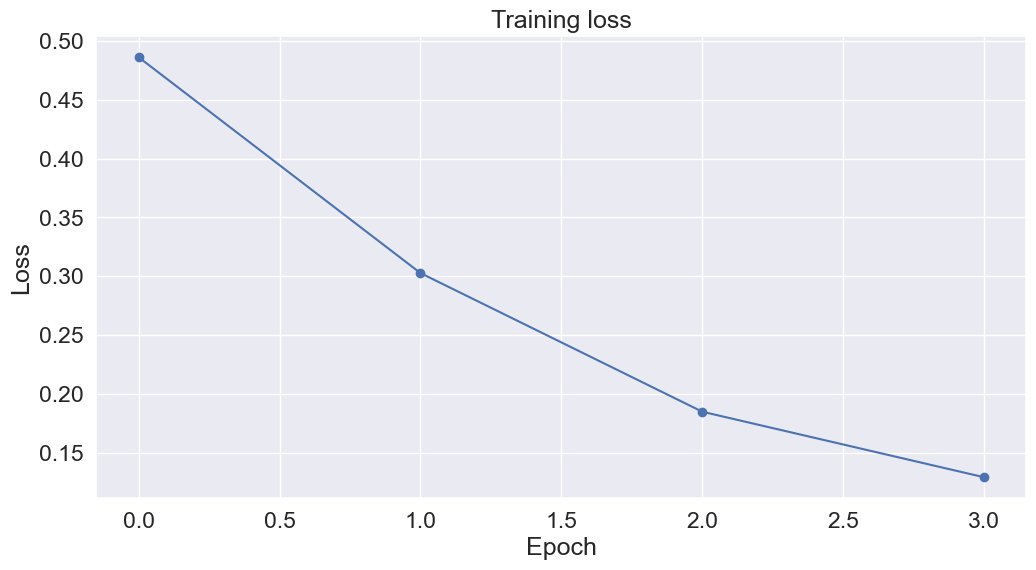

In [25]:
import matplotlib.pyplot as plt


import seaborn as sns


sns.set(style='darkgrid')


sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [26]:
loss_values

[0.48633561787268925,
 0.3026976846003928,
 0.1847325093518649,
 0.1289717183483154]

In [27]:

df = pd.read_csv("./cola_public_1.1/cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])


print('Number of test sentences: {:,}\n'.format(df.shape[0]))


sentences = df.sentence.values
labels = df.label.values


input_ids = []


for sent in sentences:
   
    encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = True, 
                   )
    
    input_ids.append(encoded_sent)


input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")


attention_masks = []


for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 


prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

 
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



In [28]:

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))


model.eval()


predictions , true_labels = [], []


for batch in prediction_dataloader:

  batch = tuple(t.to(device) for t in batch)
  

  b_input_ids, b_input_mask, b_labels = batch
  

  with torch.no_grad():
      
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('DONE.')

Predicting labels for 516 test sentences...
DONE.


In [29]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [30]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []


print('Calculating Matthews Corr. Coef. for each batch...')


for i in range(len(true_labels)):
  
  
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [39]:
matthews_set

[0.049286405809014416,
 -0.050964719143762556,
 0.4040950971038548,
 0.30508307783296046,
 0.5945883900105632,
 0.7410010097502685,
 0.6201736729460423,
 0.47519096331149147,
 1.0,
 0.6952687917708212,
 0.8459051693633014,
 0.647150228929434,
 0.7562449037944323,
 0.7141684885491869,
 0.5204956780951701,
 0.5844155844155844,
 0.0]

In [40]:

flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()


flat_true_labels = [item for sublist in true_labels for item in sublist]


mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.571
